# Инициализация проекта

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from pycaret.classification import *
from pycaret.regression import *
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, GradientBoostingClassifier, RandomForestClassifier, StackingClassifier, GradientBoostingRegressor , StackingRegressor
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
import xgboost as xgb
import lightgbm as lgb
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from pprint import pprint
from sklearn import tree

import warnings
warnings.filterwarnings("ignore")

In [1]:
!pip install pycaret

In [2]:
!pip install lightgbm

In [3]:
!pip install catboost

In [4]:
!pip install xgboost

# Лабораторная работа №5. "ДРЕВОВИДНЫЕ МОДЕЛИ: РЕШАЮЩИЕ ДЕРЕВЬЯ И ИХ КОМПОЗИЦИИ"

Задание №1.

A). Реализовать DecisionTreeClassifier и DecisionTreeRegressor из Sclearn для соответствующих наборов данных своего варианта. Осуществить настройку гиперпараметров. Выполнить оценку качества модели, визуализировать дерево решений, вывести решающие правила. Сравнить полученные результаты обучения моделей с данными, полученными с помощью PyCaret (открытая low-code библиотека ML на Python, см. Lab5_Ex3 DRs_classifier.ipynb)

B). Реализовать обучение и вычисление дерева с использованием алгоритма CART для задачи регрессии и задачи классификации. Выполнить оценку качества моделей, визуализировать дерево решений, вывести решающие правила.

Задание №2. Применить ансамбли для наборов данных своего варианта:

o BaggingClassifier

o BaggingRegressor

o GradientBoostingClassifier

o GradientBoostingRegressor

o StackingClassifier

o StackingRegressor

Выполнить оценку качества моделей и выбрать лучшую модель.

Задание №3. Реализовать для решения задачи регрессии и задачи классификации следующие библиотеки:

o Catboost

o XGBoost

o LightGBM

Выполнить оценку качества моделей и выбрать лучшую модель.


# Загрузим наши обработанные датасеты

In [6]:
data_wine = pd.read_csv("wines.csv")
data_wine = data_wine.drop(['Unnamed: 0'], axis=1)
data_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.3,0.300,0.34,1.6,0.049,14.0,0.99400,3.30,0.49,9.5,6
1,8.1,0.280,0.40,6.9,0.050,30.0,0.99510,3.26,0.44,10.1,6
2,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,6
3,6.2,0.320,0.16,7.0,0.045,30.0,0.99490,3.18,0.47,9.6,6
4,8.1,0.220,0.43,1.5,0.044,28.0,0.99380,3.22,0.45,11.0,6
...,...,...,...,...,...,...,...,...,...,...,...
4076,6.8,0.620,0.08,1.9,0.068,28.0,0.99651,3.42,0.82,9.5,6
4077,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5
4078,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2,6
4079,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,5


In [7]:
data_cs = pd.read_csv("csgo.csv")
data_cs = data_cs.drop(['Unnamed: 0'], axis=1)
data_cs

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,bomb_planted_True
0,29.27,2.0,1.0,379.0,99.0,487.0,93.0,2050.0,100.0,0.0,1.0,0.0,5.0,1.0,1
1,22.70,3.0,1.0,100.0,149.0,100.0,175.0,1050.0,1250.0,1.0,2.0,1.0,1.0,2.0,1
2,37.38,3.0,2.0,300.0,414.0,300.0,441.0,250.0,6300.0,1.0,5.0,0.0,3.0,5.0,1
3,17.38,3.0,2.0,300.0,414.0,300.0,441.0,250.0,6300.0,1.0,5.0,0.0,3.0,5.0,1
4,24.84,3.0,3.0,67.0,0.0,96.0,0.0,2150.0,0.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26451,174.92,4.0,1.0,500.0,500.0,200.0,0.0,20150.0,27750.0,0.0,0.0,2.0,5.0,5.0,0
26452,174.95,3.0,3.0,500.0,500.0,400.0,0.0,20750.0,16500.0,4.0,0.0,3.0,5.0,5.0,0
26453,175.00,13.0,11.0,500.0,500.0,387.0,0.0,28700.0,20450.0,4.0,0.0,4.0,5.0,5.0,0
26454,74.94,1.0,6.0,274.0,450.0,196.0,469.0,7150.0,33450.0,0.0,5.0,0.0,3.0,5.0,0


# Задание №1

### DecisionTreeClassifier (без гиперпараметров)

In [8]:
X = data_wine.drop(['quality'], axis = 1)
y = data_wine['quality']

In [9]:
X_train_dr, X_test_dr, y_train_dr, y_test_dr = train_test_split(X, y, test_size = .2, random_state=42)

In [10]:
dtc = DecisionTreeClassifier(max_depth=2)
dtc.fit(X_train_dr, y_train_dr)

DecisionTreeClassifier(max_depth=2)

In [11]:
y_pred_dr = dtc.predict(X_test_dr)

In [12]:
accuracy = accuracy_score(y_test_dr, y_pred_dr)
print(f'Accuracy: {accuracy}')

Accuracy: 0.543451652386781


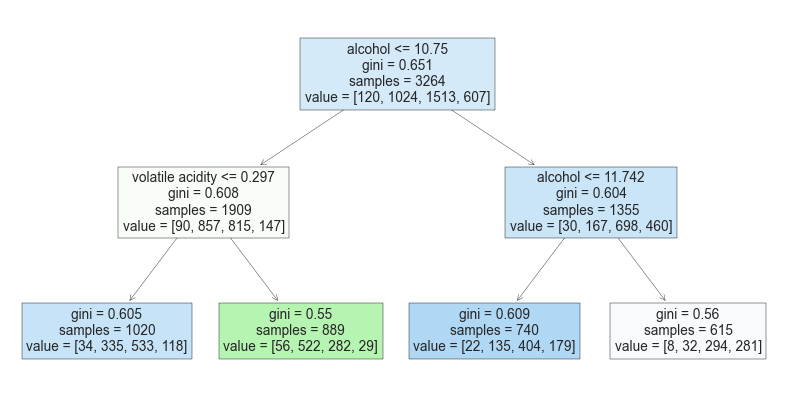

In [13]:
fig = plt.figure(figsize=(10,5))
_ = tree.plot_tree(dtc, feature_names=X_train_dr.columns, filled=True)

### DecisionTreeClassifier (с гиперпараметрами)

In [14]:
# Разделение данных на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение параметров для перебора
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Создание DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

# Создание объекта GridSearchCV
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')

# Поиск лучших параметров
grid_search.fit(X_train, y_train)

# Получение лучших параметров
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Получение лучшей модели
best_dt_model = grid_search.best_estimator_

# Прогнозирование на тестовом наборе
y_pred = best_dt_model.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.4981640146878825


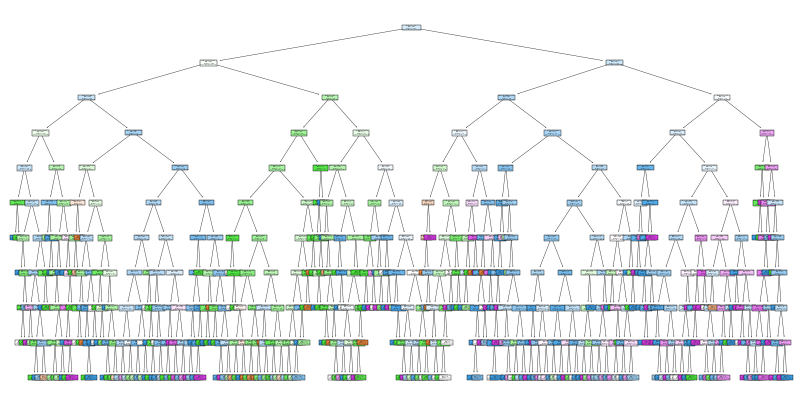

In [15]:
fig = plt.figure(figsize=(10,5))
_ = tree.plot_tree(best_dt_model, feature_names=X_train.columns, filled=True)

### DecissionTreeRegressor (без подбора гиперпараметров)

In [16]:
X_reg = data_cs.drop(['bomb_planted_True'], axis=1)
y_reg = data_cs['bomb_planted_True']
# Разделение данных на обучающий и тестовый набор
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Создание и обучение DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_reg, y_train_reg)

# Прогнозирование на тестовом наборе
y_pred_reg = regressor.predict(X_test_reg)

# Оценка качества модели (например, среднеквадратичная ошибка)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.02872260015117158


### DecissionTreeRegressor (с гиперпараметрами)

In [17]:
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Разделение данных на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение параметров для перебора
param_grid = {
    'criterion': ['mse', 'friedman_mse', 'mae'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Создание DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()

# Создание объекта GridSearchCV
grid_search = GridSearchCV(dt_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

# Поиск лучших параметров
grid_search.fit(X_train, y_train)

# Получение лучших параметров
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Получение лучшей модели
best_dt_model = grid_search.best_estimator_

# Прогнозирование на тестовом наборе
y_pred = best_dt_model.predict(X_test)

# Оценка качества модели (например, среднеквадратичная ошибка)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Визуализация данных и регрессионной модели
X_test_plot = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_pred_plot = best_dt_model.predict(X_test_plot)

Best Parameters: {'criterion': 'friedman_mse', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Mean Squared Error: 0.00811756727747125


### CART

In [18]:
import numpy as np

class MyCART:
    def __init__(self, task_type='classification', max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.task_type = task_type
        if task_type == 'classification':
            self.impurity_func = lambda x, y: self._gini(x, y)
        elif task_type == 'regression':
            self.impurity_func = lambda x, y: self._mse(x, y)

    def fit(self, X, y):
        self.root = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        if (self.max_depth is not None and depth >= self.max_depth) or len(X) <= self.min_samples_split or self._is_pure_node(y):
            leaf_value = np.mean(y) if self.task_type == 'regression' else np.argmax(np.bincount(y))
            return {'leaf': True, 'value': leaf_value}

        best_feature, best_threshold = self._find_best_split(X, y)

        if best_feature is None or best_threshold is None:
            leaf_value = np.mean(y) if self.task_type == 'regression' else np.argmax(np.bincount(y))
            return {'leaf': True, 'value': leaf_value}

        left_child_indices = X[:, best_feature] <= best_threshold
        right_child_indices = X[:, best_feature] > best_threshold

        node = {
            'feature': best_feature,
            'threshold': best_threshold,
            'left': self._build_tree(X[left_child_indices], y[left_child_indices], depth + 1),
            'right': self._build_tree(X[right_child_indices], y[right_child_indices], depth + 1)
        }

        return node

    def _find_best_split(self, X, y):
        best_impurity = float('inf') if self.task_type == 'regression' else 1.0
        best_feature = None
        best_threshold = None

        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] <= threshold
                right_indices = X[:, feature] > threshold

                impurity = self.impurity_func(y[left_indices], y[right_indices])

                if impurity < best_impurity:
                    best_impurity = impurity
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def _gini(self, left_y, right_y):
        left_gini = 1 - np.sum((np.bincount(left_y) / len(left_y))**2)
        right_gini = 1 - np.sum((np.bincount(right_y) / len(right_y))**2)
        gini = (len(left_y) * left_gini + len(right_y) * right_gini) / (len(left_y) + len(right_y))
        return gini

    def _mse(self, left_y, right_y):
        left_mse = np.mean((left_y - np.mean(left_y))**2)
        right_mse = np.mean((right_y - np.mean(right_y))**2)
        mse = (len(left_y) * left_mse + len(right_y) * right_mse) / (len(left_y) + len(right_y))
        return mse

    def _is_pure_node(self, y):
        return len(np.unique(y)) == 1

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if 'leaf' in node:
            return node['value']

        if x[node['feature']] <= node['threshold']:
            return self._traverse_tree(x, node['left'])
        else:
            return self._traverse_tree(x, node['right'])

    def get_tree_structure(self):
        return self._get_tree_structure(self.root, depth=0)

    def _get_tree_structure(self, node, depth):
        if 'leaf' in node:
            return f"Leaf: Value = {node['value']}"
        else:
            structure = f"Depth {depth}: Feature {node['feature']} <= {node['threshold']}"
            structure += "\n" + "  " * depth + "Left: " + self._get_tree_structure(node['left'], depth + 1)
            structure += "\n" + "  " * depth + "Right: " + self._get_tree_structure(node['right'], depth + 1)
            return structure


**Класс MyCART (Custom CART):**

Поддерживает как задачи классификации, так и регрессии. Выбор типа задачи производится при инициализации экземпляра класса.

Гиперпараметры:
- max_depth: Максимальная глубина дерева. По умолчанию None, что означает отсутствие ограничения.
- min_samples_split: Минимальное количество образцов, необходимое для выполнения разбиения узла. По умолчанию 2.
- min_samples_leaf: Минимальное количество образцов, необходимое для формирования листа дерева. По умолчанию 1.

Функции оценки неопределенности:
- Для задачи классификации используется индекс Джини.
- Для задачи регрессии используется среднеквадратичная ошибка (MSE).

Методы:
- __init__: Инициализация гипперпараметров и фукнции оценки неопределенности
- fit(X, y): Обучение дерева решений на обучающих данных X с соответствующими метками y.
- predict(X): Прогнозирование целевых переменных для новых данных X.
- get_tree_structure(): Получение структуры дерева в виде строки.

Прочие функции:
- _build_tree, _find_best_split: Вспомогательные функции для построения дерева и поиска оптимального разбиения.
- _is_pure_node: Проверка, является ли узел "чистым" (все метки одинаковы).
- _traverse_tree: Рекурсивная функция обхода дерева для прогнозирования.

### CART classification

In [19]:
dtc = MyCART(task_type='classification',max_depth=5, min_samples_split=5)
dtc.fit(X_train_dr.values, y_train_dr)
predict_cart = dtc.predict(X_test_dr.values)
print('Accuracy:', accuracy_score(y_test_dr, predict_cart))

Accuracy: 0.5410036719706243


### CART regressor

In [28]:
dtc = MyCART(task_type='regression',max_depth=5, min_samples_split=5)
dtc.fit(X_train_reg.values, y_train_reg)
predict_cart = dtc.predict(X_test_reg.values)
print('R^2:', r2_score(y_test_reg, predict_cart))

R^2: 0.9292658902688563


### PyCaret classification

In [23]:
from pycaret.classification import *
def pycaret_classifier_example():
    exp1 = setup(data_wine, target='quality')
    compare_models()
pycaret_classifier_example()

,Description,Value
0,Session id,5478
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"4: 0, 5: 1, 6: 2, 7: 3"
4,Original data shape,"(4081, 11)"
5,Transformed data shape,"(4081, 11)"
6,Transformed train set shape,"(2856, 11)"
7,Transformed test set shape,"(1225, 11)"
8,Numeric features,10
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.5868,0.7364,0.5868,0.5783,0.5681,0.3243,0.3314,0.0800
rf,Random Forest Classifier,0.5833,0.7334,0.5833,0.5767,0.5650,0.3187,0.3260,0.1050
catboost,CatBoost Classifier,0.5746,0.7361,0.5746,0.5649,0.5610,0.3126,0.3170,2.1700
lda,Linear Discriminant Analysis,0.5620,0.7199,0.5620,0.5435,0.5405,0.2781,0.2864,0.0090
lightgbm,Light Gradient Boosting Machine,0.5585,0.7221,0.5585,0.5468,0.5438,0.2867,0.2912,0.2160
gbc,Gradient Boosting Classifier,0.5581,0.7260,0.5581,0.5458,0.5397,0.2776,0.2847,0.2420
xgboost,Extreme Gradient Boosting,0.5536,0.7177,0.5536,0.5421,0.5406,0.2808,0.2844,0.0840
lr,Logistic Regression,0.5529,0.7143,0.5529,0.5350,0.5212,0.2501,0.2631,0.6520
ridge,Ridge Classifier,0.5466,0.0000,0.5466,0.4869,0.4830,0.2207,0.2423,0.0070
qda,Quadratic Discriminant Analysis,0.5382,0.7072,0.5382,0.5329,0.5327,0.2761,0.2773,0.0080


Лучшей моделью классификации оказалась Extra Trees Classifier

### PyCaret regression

In [29]:
from pycaret.regression import *
def pycaret_regressor_example():
    exp2 = setup(data_cs, target='bomb_planted_True')
    compare_models()
pycaret_regressor_example()

,Description,Value
0,Session id,6496
1,Target,bomb_planted_True
2,Target type,Regression
3,Original data shape,"(26456, 15)"
4,Transformed data shape,"(26456, 15)"
5,Transformed train set shape,"(18519, 15)"
6,Transformed test set shape,"(7937, 15)"
7,Numeric features,14
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.0372,0.0147,0.1208,0.9410,0.0849,0.0386,0.3330
catboost,CatBoost Regressor,0.0379,0.0151,0.1223,0.9396,0.0854,0.0392,1.8840
rf,Random Forest Regressor,0.0310,0.0152,0.1226,0.9392,0.0846,0.0337,0.5080
lightgbm,Light Gradient Boosting Machine,0.0358,0.0156,0.1245,0.9374,0.0868,0.0370,0.0980
xgboost,Extreme Gradient Boosting,0.0433,0.0168,0.1294,0.9326,0.0894,0.0480,0.0740
et,Extra Trees Regressor,0.0483,0.0197,0.1400,0.9211,0.0981,0.0524,0.2170
dt,Decision Tree Regressor,0.0275,0.0275,0.1653,0.8898,0.1146,0.0295,0.0180
ada,AdaBoost Regressor,0.1072,0.0401,0.1999,0.8396,0.1352,0.1452,0.0490
lar,Least Angle Regression,0.2086,0.0793,0.2815,0.6826,0.2042,0.1772,0.0110
lr,Linear Regression,0.2086,0.0793,0.2815,0.6826,0.2041,0.1772,0.0400


Лучшей моделью регрессии оказалась Gradient Boosting Regressor

# Задание №2

### BaggingClassifier

In [30]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a base decision tree classifier
base_classifier = DecisionTreeClassifier()

# Create a BaggingClassifier using the base classifier
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)

# Train the BaggingClassifier
bagging_classifier.fit(X_train_dr, y_train_dr)

# Make predictions on the test set
predictions = bagging_classifier.predict(X_test_dr)

# Calculate accuracy
accuracy = accuracy_score(y_test_dr, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5067319461444308


### BaggingRegressor

In [31]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Create a base decision tree regressor
base_regressor = DecisionTreeRegressor(random_state=42)

# Create a BaggingRegressor using the base regressor
bagging_regressor = BaggingRegressor(base_regressor, n_estimators=10, random_state=42)

# Train the BaggingRegressor
bagging_regressor.fit(X_train, y_train)

# Make predictions on the test set
predictions = bagging_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.006904146858649804


### GradientBoostingClassifier

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Create a GradientBoostingClassifier
gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the GradientBoostingClassifier
gradient_boosting_classifier.fit(X_train_dr, y_train_dr)

# Make predictions on the test set
predictions = gradient_boosting_classifier.predict(X_test_dr)

# Calculate accuracy
accuracy = accuracy_score(y_test_dr, predictions)
print(f'Accuracy: {accuracy}')


Accuracy: 0.5507955936352509


### GradientBoostingRegressor

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Create a GradientBoostingRegressor
gradient_boosting_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the GradientBoostingRegressor
gradient_boosting_regressor.fit(X_train, y_train)

# Make predictions on the test set
predictions = gradient_boosting_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.007864651181626131


### StackingClassifier

In [34]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


# Create base classifiers
base_classifiers = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, random_state=42)),
    # Add more base classifiers as needed
]

# Create a StackingClassifier with a logistic regression meta-classifier
stacking_classifier = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=LogisticRegression(),
    cv=5  # Number of cross-validation folds for training base classifiers
)

# Train the StackingClassifier
stacking_classifier.fit(X_train_dr, y_train_dr)

# Make predictions on the test set
predictions = stacking_classifier.predict(X_test_dr)

# Calculate accuracy
accuracy = accuracy_score(y_test_dr, predictions)
print(f'Accuracy: {accuracy}')


Accuracy: 0.5960832313341493


### StackingRegressor

In [35]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# Create base regressors
base_regressors = [
    ('rf', RandomForestRegressor(n_estimators=50, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, random_state=42)),

]

# Create a StackingRegressor with a linear regression meta-regressor
stacking_regressor = StackingRegressor(
    estimators=base_regressors,
    final_estimator=LinearRegression()
)

# Train the StackingRegressor
stacking_regressor.fit(X_train, y_train)

# Make predictions on the test set
predictions = stacking_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.009061148361898232


Лучей моделью классификации оказалась StackingClassifier, а регрессии - GradientBoostingRegressor

# Задание №3

### CatBoostClassifier

In [36]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Create a CatBoostClassifier
catboost_classifier = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, random_seed=42)

# Train the CatBoostClassifier
catboost_classifier.fit(X_train_dr, y_train_dr)

# Make predictions on the test set
predictions = catboost_classifier.predict(X_test_dr)

# Calculate accuracy
accuracy = accuracy_score(y_test_dr, predictions)
print(f'Accuracy: {accuracy}')


0:	learn: 1.3266433	total: 143ms	remaining: 14.1s
1:	learn: 1.2741628	total: 147ms	remaining: 7.2s
2:	learn: 1.2319587	total: 151ms	remaining: 4.89s
3:	learn: 1.1961010	total: 156ms	remaining: 3.75s
4:	learn: 1.1665458	total: 161ms	remaining: 3.05s
5:	learn: 1.1407388	total: 165ms	remaining: 2.58s
6:	learn: 1.1196736	total: 170ms	remaining: 2.26s
7:	learn: 1.0981555	total: 174ms	remaining: 2s
8:	learn: 1.0820126	total: 178ms	remaining: 1.8s
9:	learn: 1.0660895	total: 184ms	remaining: 1.65s
10:	learn: 1.0514781	total: 189ms	remaining: 1.53s
11:	learn: 1.0389722	total: 194ms	remaining: 1.42s
12:	learn: 1.0282922	total: 200ms	remaining: 1.33s
13:	learn: 1.0174163	total: 204ms	remaining: 1.25s
14:	learn: 1.0086506	total: 209ms	remaining: 1.19s
15:	learn: 0.9974742	total: 214ms	remaining: 1.12s
16:	learn: 0.9879952	total: 219ms	remaining: 1.07s
17:	learn: 0.9791652	total: 223ms	remaining: 1.01s
18:	learn: 0.9710503	total: 227ms	remaining: 969ms
19:	learn: 0.9650398	total: 236ms	remaining: 9

### CatBoostRegression

In [37]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create a CatBoostRegressor
catboost_regressor = CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, loss_function='RMSE', random_seed=42)

# Train the CatBoostRegressor
catboost_regressor.fit(X_train, y_train)

# Make predictions on the test set
predictions = catboost_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

0:	learn: 0.6635056	total: 819us	remaining: 81.1ms
1:	learn: 0.6121921	total: 1.52ms	remaining: 74.8ms
2:	learn: 0.5681403	total: 2.26ms	remaining: 73ms
3:	learn: 0.5247357	total: 2.77ms	remaining: 66.6ms
4:	learn: 0.4884198	total: 3.23ms	remaining: 61.4ms
5:	learn: 0.4527130	total: 3.7ms	remaining: 57.9ms
6:	learn: 0.4226326	total: 4.17ms	remaining: 55.4ms
7:	learn: 0.3917409	total: 4.61ms	remaining: 53.1ms
8:	learn: 0.3658814	total: 5.07ms	remaining: 51.3ms
9:	learn: 0.3418644	total: 5.5ms	remaining: 49.5ms
10:	learn: 0.3184792	total: 5.91ms	remaining: 47.8ms
11:	learn: 0.2968471	total: 6.2ms	remaining: 45.5ms
12:	learn: 0.2760644	total: 6.59ms	remaining: 44.1ms
13:	learn: 0.2592639	total: 6.92ms	remaining: 42.5ms
14:	learn: 0.2443831	total: 7.34ms	remaining: 41.6ms
15:	learn: 0.2299304	total: 7.53ms	remaining: 39.5ms
16:	learn: 0.2180882	total: 7.74ms	remaining: 37.8ms
17:	learn: 0.2070022	total: 8.15ms	remaining: 37.1ms
18:	learn: 0.1958204	total: 8.49ms	remaining: 36.2ms
19:	learn

### XGBoostRegression

In [38]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Create an XGBRegressor
xgb_regressor = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42) #learning_rate - этот параметр контролирует размер шага на каждой итерации при движении к минимуму функции потерь

# Train the XGBRegressor
xgb_regressor.fit(X_train, y_train)

# Make predictions on the test set
predictions = xgb_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.014651630235557649


### LigtGBMClassifier

In [39]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create an LGBMClassifier
lgbm_classifier = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the LGBMClassifier
lgbm_classifier.fit(X_train_dr, y_train_dr)

# Make predictions on the test set
predictions = lgbm_classifier.predict(X_test_dr)

# Calculate accuracy
accuracy = accuracy_score(y_test_dr, predictions)
print(f'Accuracy: {accuracy}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 985
[LightGBM] [Info] Number of data points in the train set: 3264, number of used features: 10
[LightGBM] [Info] Start training from score -3.303217
[LightGBM] [Info] Start training from score -1.159237
[LightGBM] [Info] Start training from score -0.768859
[LightGBM] [Info] Start training from score -1.682180
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

### LightGBMRegressor

In [40]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Создание LGBMRegressor
lgbm_regressor = LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42) #n_estimators - кол-во деревьев, которые будут построены

# Обучение LGBMRegressor
lgbm_regressor.fit(X_train, y_train)

# Прогнозы на тестовом наборе
predictions = lgbm_regressor.predict(X_test)

# Расчет среднеквадратичной ошибки (MSE)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000956 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1765
[LightGBM] [Info] Number of data points in the train set: 21164, number of used features: 14
[LightGBM] [Info] Start training from score 0.497921
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

Итак, лучшей моделью классификации оказалась CatBoostClassifier, а регресии - LigthGBMRegression.